In [250]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt

In [251]:
filename = 'credit_card.csv'
df = pd.read_csv(filename)

In [252]:
df.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,TRGT1
0,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
1,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [253]:
len(list(df.columns))

24

In [254]:
array = df.values
X = array[:,:-1]
Y = array[:,-1]

In [255]:
print(X.shape)
print(Y.shape)

(30000, 23)
(30000,)


In [256]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)
accuracy_train=[]
accuracy_test=[]

for i in range(1,11):
    clf = KNeighborsClassifier(n_neighbors=i)
    clf.fit(x_train, y_train)
    accuracy_train.append(clf.score(x_train, y_train))
    accuracy_test.append(clf.score(x_test, y_test))
    
print("Training accuracy list",accuracy_train)
print("Testing accuracy list",accuracy_test)


Training accuracy list [0.9995833333333334, 0.8449583333333334, 0.84375, 0.8155833333333333, 0.8159166666666666, 0.804125, 0.80625, 0.7985, 0.7992083333333333, 0.79275]
Testing accuracy list [0.6956666666666667, 0.7656666666666667, 0.7363333333333333, 0.7741666666666667, 0.7623333333333333, 0.7733333333333333, 0.767, 0.7785, 0.7716666666666666, 0.7781666666666667]


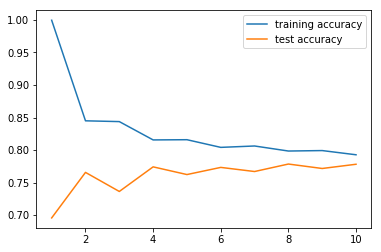

7


In [257]:
import matplotlib.pyplot as plt
n_neighbors=[i for i in range(1,11)]
plt.plot(n_neighbors, accuracy_train, label='training accuracy')
plt.plot(n_neighbors, accuracy_test, label='test accuracy')
plt.legend()
plt.show()
print(accuracy_test.index(max(accuracy_test)))


In [258]:
#We have thus concluded that for 8 neighbours, the KNN classifier yeilds a maximum accuracy of 77.85% on test dataset.

classifier = KNeighborsClassifier(n_neighbors=8)
classifier.fit(x_train, y_train)

y_predict_train = classifier.predict(x_train)
y_predict_test = classifier.predict(x_test)
print(confusion_matrix(y_train, y_predict_train))
print(classification_report(y_train, y_predict_train))
print()
print(confusion_matrix(y_test, y_predict_test))
print(classification_report(y_test, y_predict_test))

[[18306   355]
 [ 4481   858]]
              precision    recall  f1-score   support

           0       0.80      0.98      0.88     18661
           1       0.71      0.16      0.26      5339

   micro avg       0.80      0.80      0.80     24000
   macro avg       0.76      0.57      0.57     24000
weighted avg       0.78      0.80      0.75     24000


[[4536  167]
 [1162  135]]
              precision    recall  f1-score   support

           0       0.80      0.96      0.87      4703
           1       0.45      0.10      0.17      1297

   micro avg       0.78      0.78      0.78      6000
   macro avg       0.62      0.53      0.52      6000
weighted avg       0.72      0.78      0.72      6000



In [259]:
#We see that the model we trained, has low recall on classifying 1.
#So we need to normalize the data
from sklearn.preprocessing import Normalizer
norm = Normalizer().fit(X)
np.set_printoptions(precision=3)
scaledata = norm.transform(X)
#print(scaledata)
#print(X[0])
x_train, x_test, y_train, y_test = train_test_split(scaledata, Y, random_state = 0, test_size = 0.2)
clf.fit(x_train, y_train)
y_predict_train = clf.predict(x_train)
y_predict_test = clf.predict(x_test)
print(confusion_matrix(y_predict_train, y_train))
print(classification_report(y_predict_train, y_train))
print()
print(confusion_matrix(y_predict_test, y_test))
print(classification_report(y_predict_test, y_test))

[[18343  4574]
 [  318   765]]
              precision    recall  f1-score   support

           0       0.98      0.80      0.88     22917
           1       0.14      0.71      0.24      1083

   micro avg       0.80      0.80      0.80     24000
   macro avg       0.56      0.75      0.56     24000
weighted avg       0.95      0.80      0.85     24000


[[4580 1161]
 [ 123  136]]
              precision    recall  f1-score   support

           0       0.97      0.80      0.88      5741
           1       0.10      0.53      0.17       259

   micro avg       0.79      0.79      0.79      6000
   macro avg       0.54      0.66      0.53      6000
weighted avg       0.94      0.79      0.85      6000



In [260]:

print(clf.score(x_train, y_train))
print(clf.score(x_test, y_test))

0.7961666666666667
0.786


In [149]:
#From the above observations, we have noticed that the precision for 0 is high, and for 1 is poor
#We will now remove sparse values, #(data cleaning) from the dataset and see what happens

In [157]:
indexes = []
names = list(df.columns)[11:-1]
#print(names)
dfnew = df[names]
#Removing sparse values from the dataframe

In [164]:
len(names)

12

In [165]:
indexes=[]
for i in range(30000):
    row = list(dfnew.iloc[i])
    if(row.count(0)>=7):
        indexes.append(i)

In [166]:
print(len(indexes))
print(df.shape)

2797
(30000, 24)


In [168]:
#Dropping the indexes from the dataframe
dnew = df
dnew = dnew.drop(dnew.index[indexes])

In [169]:
#Part: Defining functions for the code

#Function: Classify
"""
We pass the data into the function
The function will split the data.
Will create the best model for the data (in this case, optimum value of k) KFind
Train the data
Predict the data


"""

'\nWe pass the data into the function\nThe function will split the data.\nWill create the best model for the data (in this case, optimum value of k) KFind\nTrain the data\nPredict the data\n\n\n'

In [170]:
def KFind(x_train, x_test, y_train, y_test):
    accuracy_train=[]
    accuracy_test=[]
    for i in range(1,11):
        clf = KNeighborsClassifier(n_neighbors=i)
        clf.fit(x_train, y_train)
        accuracy_train.append(clf.score(x_train, y_train))
        accuracy_test.append(clf.score(x_test, y_test))
    #K will be the maximum accuracy for test data
    maximum = max(accuracy_test)
    index = accuracy_test.index(maximum)
    no_of_neighbours = index+1
    return(no_of_neighbours)

In [249]:
array = df.values
X = array[:,:-1]
print(X[:,1])

[2 2 2 ... 1 1 1]


In [240]:
#Scale the data: Define a normalizer function
def Normalizer(df):
    array = df.values
    lower = 1
    upper = 10
    X = array[:,:-1]
    X = X.astype('float64') 
    Y = array[:,-1]
    flag=0;
    print(type(X[2,3]))
    #We normalize all columns of X
    for i in range(X.shape[1]):
        column = X[:,i]
        maximum = np.max(column)
        minimum = np.min(column)
        for j in range(column.shape[0]):
            column[j] = (upper-lower) * (column[j]-minimum)/(maximum-minimum) + lower
        X[:,i]=column   
    return X, Y

In [246]:
X, Y = Normalizer(dnew)
print(X.shape)
print(X[1,:])
print(X[2,:])

<class 'numpy.float64'>
(27203, 23)
[ 1. 10.  4.  7.  3.  2.  2.  2.  2.  2.  2.  2. 10.  1.  2.  1.  3.  1.
  1.  1.  1.  1.  1.]
[ 1. 10.  4.  4.  3.  2.  2.  2.  2.  2.  2.  2.  1.  2.  2.  1.  3.  1.
  1.  1.  1.  1.  1.]


In [236]:
#Now, we will implement the code
X, Y = Normalizer(dnew)
x_train, x_test, y_train, y_test = train_test_split(X, Y, random_state=7, test_size=0.33)
k = KFind(x_train, x_test, y_train, y_test)
print(k)
clf = KNeighborsClassifier(n_neighbors=k)
clf.fit(x_train, y_train)
y_predict_train = clf.predict(x_train)
y_predict_test = clf.predict(x_test)

<class 'numpy.float64'>
[1. 1. 1. 1. 1. 1. 1. 1. 1.]
10.0   1.0
<class 'numpy.float64'>
9


In [187]:
print("Confusion matrix and Classification report of train dataset")
print(confusion_matrix(y_predict_train, y_train))
print(classification_report(y_predict_train, y_train))
print("Confusion matrix and Classification report of test dataset")
print(classification_report(y_predict_test, y_test))
print(confusion_matrix(y_predict_test, y_test))
print("Training set Accuracy")
print(clf.score(x_train, y_train))
print()
print("Test set Accuracy")
print(clf.score(x_test, y_test))

Confusion matrix and Classification report of train dataset
[[13560  2330]
 [  666  1670]]
              precision    recall  f1-score   support

           0       0.95      0.85      0.90     15890
           1       0.42      0.71      0.53      2336

   micro avg       0.84      0.84      0.84     18226
   macro avg       0.69      0.78      0.71     18226
weighted avg       0.88      0.84      0.85     18226

Confusion matrix and Classification report of test dataset
              precision    recall  f1-score   support

           0       0.94      0.84      0.89      7868
           1       0.35      0.61      0.45      1109

   micro avg       0.81      0.81      0.81      8977
   macro avg       0.65      0.73      0.67      8977
weighted avg       0.87      0.81      0.83      8977

[[6634 1234]
 [ 431  678]]
Training set Accuracy
0.8356194447492593

Test set Accuracy
0.8145260109167873


In [188]:
X[:5,22]

array([1, 1, 1, 1, 1])

In [189]:
X[:5,22].dtype

dtype('int64')

In [262]:
print(list(df.iloc[0]))

[20000, 2, 2, 1, 24, 2, 2, -1, -1, -2, -2, 3913, 3102, 689, 0, 0, 0, 0, 689, 0, 0, 0, 0, 1]
